# **Class - Applied Machine Learning** 
## Homework - 01 - Classification With Naive Bayes
###Submitted by: Naveen Vasu(nvasu2@illinois.edu) & Rohit Bansal(rbansal3@illinois.edu)
---




# Problem 1: Diabetes Classification

## Part 1A 

In [ ]:
import pandas as pd
import numpy as np
import random
import math
from scipy.stats import norm

#Read the data file
def readFile():
    my_file = pd.read_csv( '../content/pima-indians-diabetes.csv' , 
                        sep = ',', 
                        names = ['Preg','Glu','BP','ST','INS','BMI','DPF','Age','Label'])
    return my_file

#Split the data into train and test set by 80-20
def split(my_file):
    x= random.randint(0,int((my_file['Label'].count()-1)*.8))
    y = int((my_file['Label'].count()-1)*.2)
    arr = my_file.values
    train = arr[0:x]
    test = arr[x:x+y]
    train2 = arr[x+y:]
    train = np.append(train, train2, axis=0)
    return (train, test)

#Split the training into two classes of label (1 and 0)
def classifyTrain(train):
    row_indices1 = np.where(train[:,8] == 1)
    row_indices0 = np.where(train[:,8] == 0)
    train1      = train[row_indices1]
    train0      = train[row_indices0]
    return (train1, train0)

#From the two arrays get the normal distribution parameters 
#i.e. mean and variance for each attribute
def getnormdist(train1,train0):
    mean1 = []
    var1 = []
    mean0 = []
    var0 = []
    for i in range(0,8):
        mean1.append(np.mean(train1[:,i]))
        var1.append(np.var(train1[:,i]))
        mean0.append(np.mean(train0[:,i]))
        var0.append(np.var(train0[:,i]))
    return (mean1, var1, mean0, var0)

#Get Label probability as required for naive bayes
def getLabelProb(train1,train0):
    x = np.size(train1,0)
    y = np.size(train0,0)
    p1 = x/(x+y)
    p0 = 1-p1
    return (p1,p0)

#Apply Naive Bayes to get accuracy of predictions 
def testAccuracyNB(p1,p0,mean1,var1,mean0,var0,test):
    accuracy = 0
    #print(np.size(test,0))
    for i in range(0,np.size(test,0)):
        #insitialize with log of label probability
        prob1 = np.log(p1)
        prob0 = np.log(p0)
        res = -1
        #loop to get add the log of each parameter conditional probability 
        #i.e. p(x/y) for y = 0 and 1 
        for j in range(0,8):
            prob1+=np.log(norm.pdf(test[i,j], mean1[j], np.sqrt(var1[j])))
            prob0+=np.log(norm.pdf(test[i,j], mean0[j], np.sqrt(var0[j])))
        #assign the higher prob
        if prob1 > prob0:
            res = 1
        else:
            res = 0
        #Check if you got it right or not, 
        #if yes add it to your accuracy count
        if res == test[i,8]:
            accuracy+=1
    #calculate the % for accuracy and return
    return accuracy/np.size(test,0)

def classifyUsingNB():
    #read datafile
    f = readFile()
    acc = []
    #get the prediction 10 times by spliting it 10 times randomly
    for i in range(0,10):
        #split the data in 80-20 ratio
        (train, test) = split(f)
        #get the array data for label1 and label0
        (t1,t0) = classifyTrain(train)
        #get the probability of 1 and 0 based on train data 
        (p1,p0) = getLabelProb(t1,t0)
        #get the normal distribution parameters
        (m1,v1,m0,v0) = getnormdist(t1,t0)
        #get the predication's accuracy using naive bayes
        acc.append(testAccuracyNB(p1,p0,m1,v1,m0,v0,test))
    #print the average accuracy
    print (acc)
    print(sum(acc)/len(acc))
    return (sum(acc)/len(acc))

accuracy1A = classifyUsingNB()  

[0.7908496732026143, 0.7712418300653595, 0.8235294117647058, 0.7908496732026143, 0.7973856209150327, 0.7777777777777778, 0.6993464052287581, 0.7777777777777778, 0.7712418300653595, 0.738562091503268]
0.7738562091503268


## Part 1B

In [ ]:
#From the two arrays get the normal distribution parameters 
#i.e. mean and variance for each attribute
def getnormdist1(train1,train0):
    mean1 = []
    var1 = []
    mean0 = []
    var0 = []
    special = [2,3,5,7]
    for i in range(0,8):
        if i in special:
            row_nums1 = np.where(train1[:,i] != 0)
            temp1 = train1[row_nums1]
            row_nums0 = np.where(train0[:,i] != 0)
            temp0 = train0[row_nums0]
            mean1.append(np.mean(train1[:,i]))
            var1.append(np.var(train1[:,i]))
            mean0.append(np.mean(train0[:,i]))
            var0.append(np.var(train0[:,i]))
        else:
            mean1.append(np.mean(train1[:,i]))
            var1.append(np.var(train1[:,i]))
            mean0.append(np.mean(train0[:,i]))
            var0.append(np.var(train0[:,i]))
    return (mean1, var1, mean0, var0)

#Apply Naive Bayes to get accuracy of predictions 
def testAccuracyNB1(p1,p0,mean1,var1,mean0,var0,test):
    accuracy = 0
    special = [2,3,5,7]
    for i in range(0,np.size(test,0)):
        #insitialize with log of label probability
        prob1 = np.log(p1)
        prob0 = np.log(p0)
        res = -1
        #loop to get add the log of each parameter conditional probability 
        #i.e. p(x/y) for y = 0 and 1 
        for j in range(0,8):
            if test[i,j] == 0 and j in special:
                continue
            prob1+=np.log(norm.pdf(test[i,j], mean1[j], np.sqrt(var1[j])))
            prob0+=np.log(norm.pdf(test[i,j], mean0[j], np.sqrt(var0[j])))
        #assign the higher prob
        if prob1 > prob0:
            res = 1
        else:
            res = 0
        #Check if you got it right or not, 
        #if yes add it to your accuracy count
        if res == test[i,8]:
            accuracy+=1
    #calculate the % for accuracy and return
    return accuracy/np.size(test,0)

def classifyUsingNB1():
    #read datafile
    f = readFile()
    acc = []
    #get the prediction 10 times by spliting it 10 times randomly
    for i in range(0,10):
        #split the data in 80-20 ratio
        (train, test) = split(f)
        #get the array data for label1 and label0
        (t1,t0) = classifyTrain(train)
        #get the probability of 1 and 0 based on train data 
        (p1,p0) = getLabelProb(t1,t0)
        #get the normal distribution parameters
        (m1,v1,m0,v0) = getnormdist1(t1,t0)
        #get the predication's accuracy using naive bayes
        acc.append(testAccuracyNB1(p1,p0,m1,v1,m0,v0,test))
    #print(acc)
    #print the average accuracy
    print (sum(acc)/len(acc))
    return (sum(acc)/len(acc))

accuracy1B = classifyUsingNB1()        

0.7686274509803921


# Problem 2: MNIST Image Classification

## Preparing and Loading MNIST Datasets

### Download dataset files

In [ ]:
import os,urllib.request

datapath = '../Data/MNISTData/'
if not os.path.exists(datapath):
    os.makedirs(datapath)

urls = ['http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
       'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
       'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
       'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz']

for url in urls:
    filename = url.split('/')[-1]
    if os.path.exists(datapath+filename):
        print(filename, ' already exists')
    else:
        print('Downloading ',filename)
        urllib.request.urlretrieve (url, datapath+filename)
     
print('All files are downloaded for MNIST dataset')

train-images-idx3-ubyte.gz  already exists
train-labels-idx1-ubyte.gz  already exists
t10k-images-idx3-ubyte.gz  already exists
t10k-labels-idx1-ubyte.gz  already exists
All files are downloaded for MNIST dataset


### Extract files and load data into dictionary

In [ ]:
import os,gzip,shutil, codecs
import numpy as np

datapath = '../Data/MNISTData/'  
files = os.listdir(datapath)
for file in files:
    if file.endswith('gz'):
        print('Extracting ',file)
        with gzip.open(datapath+file, 'rb') as f_in:
            with open(datapath+file.split('.')[0], 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
print('Extraction Complete')

for file in files:
    print('Removing ',file)
    os.remove(datapath+file)
print ('All archives removed')

datapath = '../Data/MNISTData/'
files = os.listdir(datapath)

def get_int(b):
  return int(codecs.encode(b, 'hex'), 16)

data_dict = {}
for file in files:
    if file.endswith('ubyte'):
        print('Reading ',file)
        with open (datapath+file,'rb') as f:
            data = f.read()
            type = get_int(data[:4])
            length = get_int(data[4:8])
            if (type == 2051):
                category = 'images'
                num_rows = get_int(data[8:12])
                num_cols = get_int(data[12:16])
                parsed = np.frombuffer(data,dtype = np.uint8, offset = 16)
                parsed = parsed.reshape(length,num_rows*num_cols)
            elif(type == 2049):
                category = 'labels'
                parsed = np.frombuffer(data, dtype=np.uint8, offset=8)
                parsed = parsed.reshape(length)
            if (length==10000):
                set = 'test'
            elif (length==60000):
                set = 'train'
            data_dict[set+'_'+category] = parsed

print(data_dict.keys())

Extracting  train-images-idx3-ubyte.gz
Extracting  t10k-labels-idx1-ubyte.gz
Extracting  train-labels-idx1-ubyte.gz
Extracting  t10k-images-idx3-ubyte.gz
Extraction Complete
Removing  train-images-idx3-ubyte.gz
Removing  t10k-labels-idx1-ubyte.gz
Removing  train-labels-idx1-ubyte.gz
Removing  t10k-images-idx3-ubyte.gz
All archives removed
Reading  t10k-labels-idx1-ubyte
Reading  train-labels-idx1-ubyte
Reading  t10k-images-idx3-ubyte
Reading  train-images-idx3-ubyte
dict_keys(['test_labels', 'train_labels', 'test_images', 'train_images'])


### Preparing Stretched Images

In [ ]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import cv2

train_images = data_dict['train_images']
train_labels = data_dict['train_labels']
test_images = data_dict['test_images']
test_labels = data_dict['test_labels']
no_of_tests = test_images.shape[0]
no_of_samples = train_images.shape[0]

train0 = train_images[np.where(train_labels[:] == 0)]
train1 = train_images[np.where(train_labels[:] == 1)]
train2 = train_images[np.where(train_labels[:] == 2)]
train3 = train_images[np.where(train_labels[:] == 3)]
train4 = train_images[np.where(train_labels[:] == 4)]
train5 = train_images[np.where(train_labels[:] == 5)]
train6 = train_images[np.where(train_labels[:] == 6)]
train7 = train_images[np.where(train_labels[:] == 7)]
train8 = train_images[np.where(train_labels[:] == 8)]
train9 = train_images[np.where(train_labels[:] == 9)]


STRETCHED_TRAIN_IMAGES = train_images.reshape(no_of_samples, 28, 28)

for i in range (no_of_samples):
  
  min_j, min_k, max_j, max_k = 255,255,0,0;
  y=[]

  for j in range (28):
    for k in range (28):
      if(STRETCHED_TRAIN_IMAGES[i][j][k] > 0):
        if(j < min_j):
          min_j = j
        if(j > max_j):
           max_j = j
        if(k < min_k):
          min_k = k
        if(k > max_k):
          max_k = k
  
  for j in range (min_j, max_j+1):
    x=[]
    for k in range (min_k, max_k+1):
       x.append(STRETCHED_TRAIN_IMAGES[i][j][k])
    y.append(x)
  
  arr = np.array(y)
  resized = cv2.resize(arr, (20,20), interpolation = cv2.INTER_NEAREST)
  
  if i == 0:
    stretched_train_image = resized.flatten().reshape(1,400)
  else:
    stretched_train_image = np.append(stretched_train_image, resized.flatten().reshape(1,400), axis = 0)
  
train0_stretched = stretched_train_image[np.where(train_labels[:] == 0)]
train1_stretched = stretched_train_image[np.where(train_labels[:] == 1)]
train2_stretched = stretched_train_image[np.where(train_labels[:] == 2)]
train3_stretched = stretched_train_image[np.where(train_labels[:] == 3)]
train4_stretched = stretched_train_image[np.where(train_labels[:] == 4)]
train5_stretched = stretched_train_image[np.where(train_labels[:] == 5)]
train6_stretched = stretched_train_image[np.where(train_labels[:] == 6)]
train7_stretched = stretched_train_image[np.where(train_labels[:] == 7)]
train8_stretched = stretched_train_image[np.where(train_labels[:] == 8)]
train9_stretched = stretched_train_image[np.where(train_labels[:] == 9)]
        
print('Train images Strethed !')

STRETCHED_TEST_IMAGES = test_images.reshape(no_of_tests, 28, 28)

for i in range (no_of_tests):
  
  min_j, min_k, max_j, max_k = 255,255,0,0;
  y=[]

  for j in range (28):
    for k in range (28):
      if(STRETCHED_TEST_IMAGES[i][j][k] > 0):
        if(j < min_j):
          min_j = j
        if(j > max_j):
           max_j = j
        if(k < min_k):
          min_k = k
        if(k > max_k):
          max_k = k
  
  for j in range (min_j, max_j+1):
    x=[]
    for k in range (min_k, max_k+1):
       x.append(STRETCHED_TEST_IMAGES[i][j][k])
    y.append(x)
  
  arr = np.array(y)
  resized = cv2.resize(arr, (20,20), interpolation = cv2.INTER_NEAREST)
  
  if i == 0:
    stretched_test_image = resized.flatten().reshape(1,400)
  else:
    stretched_test_image = np.append(stretched_test_image, resized.flatten().reshape(1,400), axis = 0)

print('Test images Strethed !')

Train images Strethed !
Test images Strethed !


## Part 2A: MNIST using naive Bayes

### Normal distribution

#### Accuracy for untouched images

In [ ]:
from scipy.stats import norm


image_size = np.size(train0[0])

P_0 = np.log((np.size(train0)/image_size)/no_of_samples)
P_1 = np.log((np.size(train1)/image_size)/no_of_samples)
P_2 = np.log((np.size(train2)/image_size)/no_of_samples)
P_3 = np.log((np.size(train3)/image_size)/no_of_samples)
P_4 = np.log((np.size(train4)/image_size)/no_of_samples)
P_5 = np.log((np.size(train5)/image_size)/no_of_samples)
P_6 = np.log((np.size(train6)/image_size)/no_of_samples)
P_7 = np.log((np.size(train7)/image_size)/no_of_samples)
P_8 = np.log((np.size(train8)/image_size)/no_of_samples)
P_9 = np.log((np.size(train9)/image_size)/no_of_samples)
print('Calculated probabilities !')

def generateMeanVar(train0, train1, train2, train3, train4, train5, train6, train7, train8, train9): 
  mean_0 = (np.mean(train0, axis =0))
  mean_1 = (np.mean(train1, axis =0))
  mean_2 = (np.mean(train2, axis =0))
  mean_3 = (np.mean(train3, axis =0))
  mean_4 = (np.mean(train4, axis =0))
  mean_5 = (np.mean(train5, axis =0))
  mean_6 = (np.mean(train6, axis =0))
  mean_7 = (np.mean(train7, axis =0))
  mean_8 = (np.mean(train8, axis =0))
  mean_9 = (np.mean(train9, axis =0))
  var_0 = (np.std(train0, axis =0))
  var_1 = (np.std(train1, axis =0))
  var_2 = (np.std(train2, axis =0))
  var_3 = (np.std(train3, axis =0))
  var_4 = (np.std(train4, axis =0))
  var_5 = (np.std(train5, axis =0))
  var_6 = (np.std(train6, axis =0))
  var_7 = (np.std(train7, axis =0))
  var_8 = (np.std(train8, axis =0))
  var_9 = (np.std(train9, axis =0))

  nonzerovarrow0 = np.where(var_0[:]!=0) 
  nonzerovarrow1 = np.where(var_1[:]!=0) 
  nonzerovarrow2 = np.where(var_2[:]!=0) 
  nonzerovarrow3 = np.where(var_3[:]!=0) 
  nonzerovarrow4 = np.where(var_4[:]!=0) 
  nonzerovarrow5 = np.where(var_5[:]!=0) 
  nonzerovarrow6 = np.where(var_6[:]!=0) 
  nonzerovarrow7 = np.where(var_7[:]!=0) 
  nonzerovarrow8 = np.where(var_8[:]!=0)
  nonzerovarrow9 = np.where(var_9[:]!=0) 
  
  print('Mean and Variance generated successfully !')
  
  return (mean_0, mean_1, mean_2, mean_3, mean_4, mean_5, mean_6, mean_7, mean_8, mean_9, 
          var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9,
         [nonzerovarrow0,nonzerovarrow1,nonzerovarrow2,nonzerovarrow3,nonzerovarrow4,
          nonzerovarrow5,nonzerovarrow6,nonzerovarrow7,nonzerovarrow8,nonzerovarrow9])

def getHighestProbability(probs):
  max = probs[0]
  res = 0
  for i in range(1,10):
    if probs[i] > max:
      max = probs[i]
      res = i
  return res

def getAccuracy(TEST_IMAGES, test_labels, mean_0, mean_1, mean_2, mean_3, mean_4, mean_5, mean_6, mean_7, mean_8, mean_9, 
                var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9, P,nonzerovarrow):
  accuracy = 0
  no = TEST_IMAGES.shape[0]
  for i in range(0,no):
    x = TEST_IMAGES[i,:]
    
    prob0 =P[0]+sum(norm.logpdf(x[nonzerovarrow[0]], mean_0[nonzerovarrow[0]], var_0[nonzerovarrow[0]]))
    prob1 =P[1]+sum(norm.logpdf(x[nonzerovarrow[1]], mean_1[nonzerovarrow[1]], var_1[nonzerovarrow[1]]))
    prob2 =P[2]+sum(norm.logpdf(x[nonzerovarrow[2]], mean_2[nonzerovarrow[2]], var_2[nonzerovarrow[2]]))
    prob3 =P[3]+sum(norm.logpdf(x[nonzerovarrow[3]], mean_3[nonzerovarrow[3]], var_3[nonzerovarrow[3]]))
    prob4 =P[4]+sum(norm.logpdf(x[nonzerovarrow[4]], mean_4[nonzerovarrow[4]], var_4[nonzerovarrow[4]]))
    prob5 =P[5]+sum(norm.logpdf(x[nonzerovarrow[5]], mean_5[nonzerovarrow[5]], var_5[nonzerovarrow[5]]))
    prob6 =P[6]+sum(norm.logpdf(x[nonzerovarrow[6]], mean_6[nonzerovarrow[6]], var_6[nonzerovarrow[6]]))
    prob7 =P[7]+sum(norm.logpdf(x[nonzerovarrow[7]], mean_7[nonzerovarrow[7]], var_7[nonzerovarrow[7]]))
    prob8 =P[8]+sum(norm.logpdf(x[nonzerovarrow[8]], mean_8[nonzerovarrow[8]], var_8[nonzerovarrow[8]]))
    prob9 =P[9]+sum(norm.logpdf(x[nonzerovarrow[9]], mean_9[nonzerovarrow[9]], var_9[nonzerovarrow[9]]))

    res = getHighestProbability([prob0, prob1, prob2, prob3, prob4, prob5, prob6, prob7, prob8, prob9])

    if(res == test_labels[i]):
      accuracy += 1
      
  return accuracy/no

(mean_0, mean_1, mean_2, mean_3, mean_4, mean_5, mean_6, mean_7, mean_8, mean_9,
 var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9,
 nonzerovarrow) = generateMeanVar(train0, train1, train2, train3, train4, train5, train6, train7, train8, train9)

accuracy_train_untouched = getAccuracy(train_images, train_labels, 
                                       mean_0, mean_1, mean_2, mean_3, mean_4, mean_5, mean_6, mean_7, mean_8, mean_9,
                                       var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9, 
                                       [P_0, P_1, P_2, P_3, P_4, P_5, P_6, P_7, P_8, P_9], nonzerovarrow)

print('Accuracy for the Train data with untouched images: ', accuracy_train_untouched)

accuracy_test_untouched = getAccuracy(test_images, test_labels, 
                                      mean_0, mean_1, mean_2, mean_3, mean_4, mean_5, mean_6, mean_7, mean_8, mean_9,
                                      var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9,
                                      [P_0, P_1, P_2, P_3, P_4, P_5, P_6, P_7, P_8, P_9], nonzerovarrow)
print('Accuracy for the Test data with untouched images: ', accuracy_test_untouched)

Calculated probabilities !
Mean and Variance generated successfully !
Accuracy for the Train data with untouched images:  0.6498
Accuracy for the Test data with untouched images:  0.6483


#### Mean untouched images

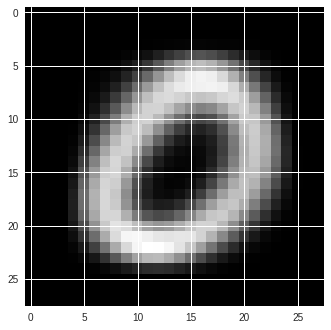

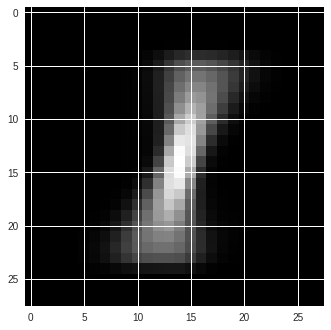

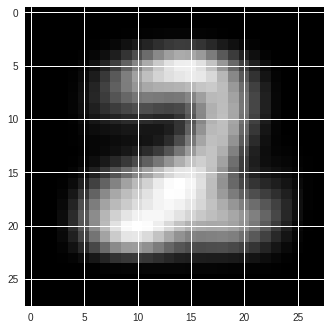

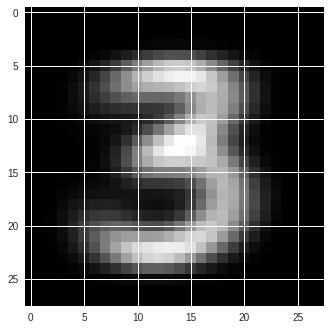

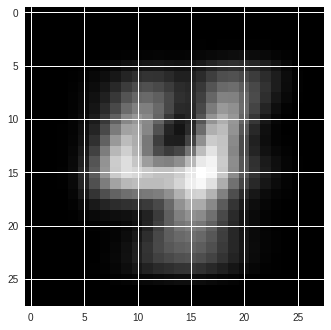

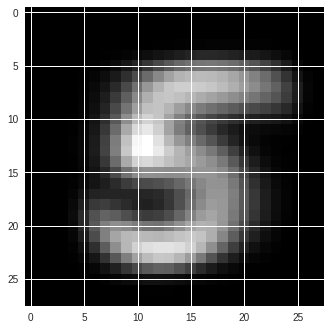

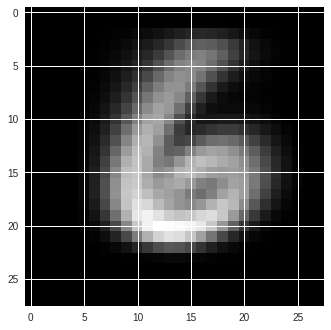

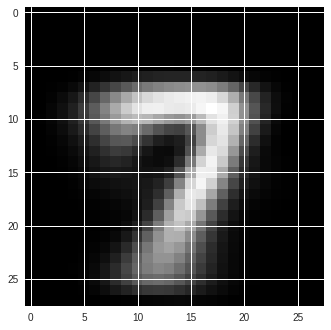

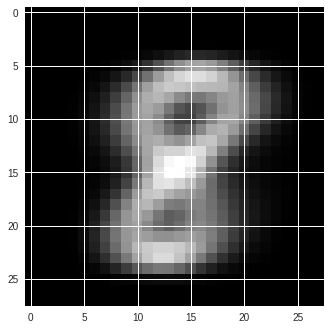

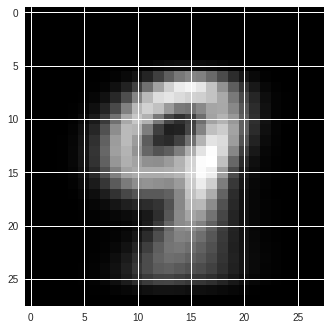

In [ ]:
def generateShape(d, n):
  d.shape=(n, n)
  plt.imshow(d,cmap='gray')
  plt.show()

generateShape(mean_0, 28)
generateShape(mean_1, 28)
generateShape(mean_2, 28)
generateShape(mean_3, 28)
generateShape(mean_4, 28)
generateShape(mean_5, 28)
generateShape(mean_6, 28)
generateShape(mean_7, 28)
generateShape(mean_8, 28)
generateShape(mean_9, 28)  

#### Accuracy for Stretched images

In [ ]:
(mean_0, mean_1, mean_2, mean_3, mean_4, mean_5, mean_6, mean_7, mean_8, mean_9, 
 var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9, 
 nonzerovarrow) = generateMeanVar(train0_stretched, train1_stretched, train2_stretched, train3_stretched, 
                train4_stretched, train5_stretched, train6_stretched, train7_stretched, train8_stretched, train9_stretched)

accuracy_train_stretched = getAccuracy(stretched_train_image, train_labels, 
                                       mean_0, mean_1, mean_2, mean_3, mean_4, mean_5, mean_6, mean_7, mean_8, mean_9,
                                       var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9, 
                                       [P_0, P_1, P_2, P_3, P_4, P_5, P_6, P_7, P_8, P_9], nonzerovarrow)
print('Accuracy for the Train data with untouched images: ', accuracy_train_stretched)

accuracy_test_stretched = getAccuracy(stretched_test_image, test_labels, 
                                      mean_0, mean_1, mean_2, mean_3, mean_4, mean_5, mean_6, mean_7, mean_8, mean_9,
                                      var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9, 
                                      [P_0, P_1, P_2, P_3, P_4, P_5, P_6, P_7, P_8, P_9], nonzerovarrow)
print('Accuracy for the Test data with untouched images: ', accuracy_test_stretched)

Mean and Variance generated successfully !
Accuracy for the Train data with untouched images:  0.81265
Accuracy for the Test data with untouched images:  0.8263


#### Mean Stretched images

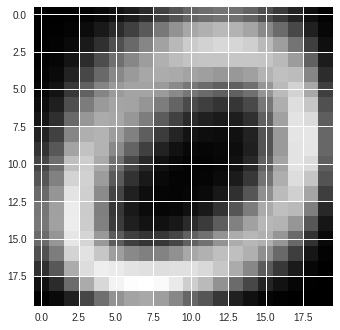

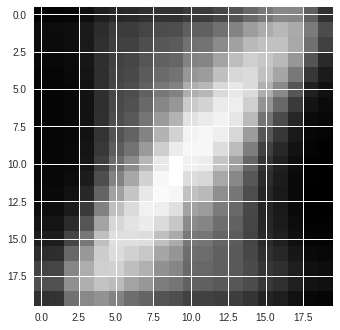

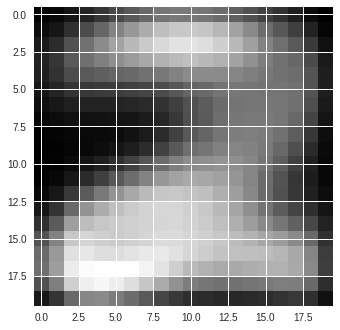

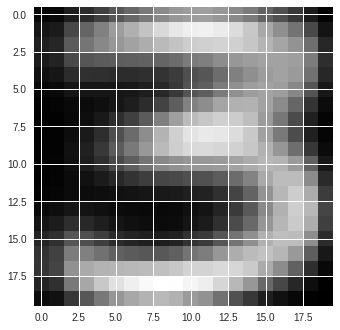

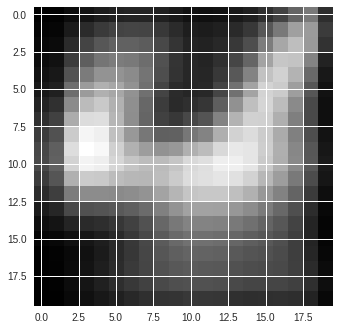

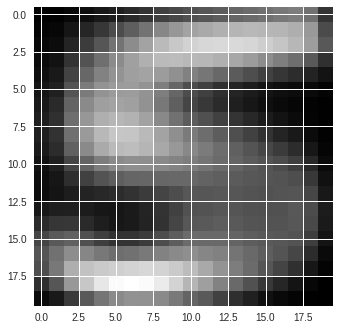

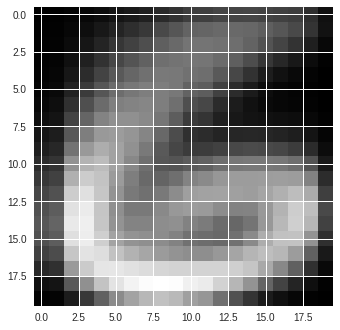

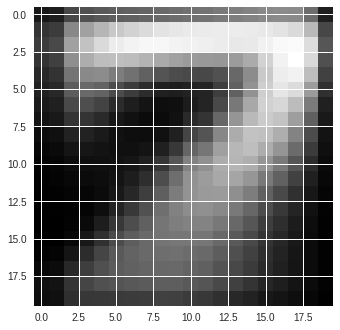

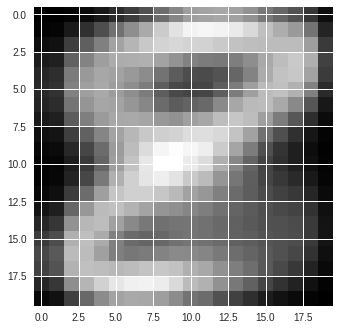

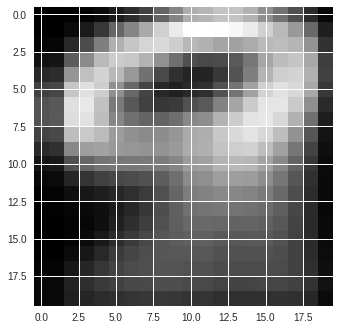

In [ ]:
generateShape(mean_0, 20)
generateShape(mean_1, 20)
generateShape(mean_2, 20)
generateShape(mean_3, 20)
generateShape(mean_4, 20)
generateShape(mean_5, 20)
generateShape(mean_6, 20)
generateShape(mean_7, 20)
generateShape(mean_8, 20)
generateShape(mean_9, 20)  

### Bernouilli Distribution

#### Accuracy for untouched images

In [ ]:
#Apply Threshold

t_train_images = np.copy(train_images)
t_train_images[t_train_images>0] = 1

t_test_images = np.copy(test_images)
t_test_images[t_test_images>0] = 1

ts_train_images = np.copy(stretched_train_image)
ts_train_images[ts_train_images>0] = 1

ts_test_images = np.copy(stretched_test_image)
ts_test_images[ts_test_images>0] = 1




#get probability 
t_train0_stretched = ts_train_images[np.where(train_labels[:] == 0)]
t_train1_stretched = ts_train_images[np.where(train_labels[:] == 1)]
t_train2_stretched = ts_train_images[np.where(train_labels[:] == 2)]
t_train3_stretched = ts_train_images[np.where(train_labels[:] == 3)]
t_train4_stretched = ts_train_images[np.where(train_labels[:] == 4)]
t_train5_stretched = ts_train_images[np.where(train_labels[:] == 5)]
t_train6_stretched = ts_train_images[np.where(train_labels[:] == 6)]
t_train7_stretched = ts_train_images[np.where(train_labels[:] == 7)]
t_train8_stretched = ts_train_images[np.where(train_labels[:] == 8)]
t_train9_stretched = ts_train_images[np.where(train_labels[:] == 9)]
        
t_train0 = t_train_images[np.where(train_labels[:] == 0)]
t_train1 = t_train_images[np.where(train_labels[:] == 1)]
t_train2 = t_train_images[np.where(train_labels[:] == 2)]
t_train3 = t_train_images[np.where(train_labels[:] == 3)]
t_train4 = t_train_images[np.where(train_labels[:] == 4)]
t_train5 = t_train_images[np.where(train_labels[:] == 5)]
t_train6 = t_train_images[np.where(train_labels[:] == 6)]
t_train7 = t_train_images[np.where(train_labels[:] == 7)]
t_train8 = t_train_images[np.where(train_labels[:] == 8)]
t_train9 = t_train_images[np.where(train_labels[:] == 9)]

pb_0 = (np.sum(t_train0, axis =0)/t_train0.shape[0])
pb_1 = (np.sum(t_train1, axis =0)/t_train1.shape[0])
pb_2 = (np.sum(t_train2, axis =0)/t_train2.shape[0])
pb_3 = (np.sum(t_train3, axis =0)/t_train3.shape[0])
pb_4 = (np.sum(t_train4, axis =0)/t_train4.shape[0])
pb_5 = (np.sum(t_train5, axis =0)/t_train5.shape[0])
pb_6 = (np.sum(t_train6, axis =0)/t_train6.shape[0])
pb_7 = (np.sum(t_train7, axis =0)/t_train7.shape[0])
pb_8 = (np.sum(t_train8, axis =0)/t_train8.shape[0])
pb_9 = (np.sum(t_train9, axis =0)/t_train9.shape[0])  

pbs_0 = (np.sum(t_train0_stretched, axis =0)/t_train0_stretched.shape[0])
pbs_1 = (np.sum(t_train1_stretched, axis =0)/t_train1_stretched.shape[0])
pbs_2 = (np.sum(t_train2_stretched, axis =0)/t_train2_stretched.shape[0])
pbs_3 = (np.sum(t_train3_stretched, axis =0)/t_train3_stretched.shape[0])
pbs_4 = (np.sum(t_train4_stretched, axis =0)/t_train4_stretched.shape[0])
pbs_5 = (np.sum(t_train5_stretched, axis =0)/t_train5_stretched.shape[0])
pbs_6 = (np.sum(t_train6_stretched, axis =0)/t_train6_stretched.shape[0])
pbs_7 = (np.sum(t_train7_stretched, axis =0)/t_train7_stretched.shape[0])
pbs_8 = (np.sum(t_train8_stretched, axis =0)/t_train8_stretched.shape[0])
pbs_9 = (np.sum(t_train9_stretched, axis =0)/t_train9_stretched.shape[0]) 

accuracy = 0
for i in range(0,no_of_samples):
  x = t_train_images[i,:]
  prob0 =P_0+sum(np.log(np.multiply(x, pb_0)+np.multiply(1-x, 1-pb_0)))
  prob1 =P_1+sum(np.log(np.multiply(x, pb_1)+np.multiply(1-x, 1-pb_1)))
  prob2 =P_2+sum(np.log(np.multiply(x, pb_2)+np.multiply(1-x, 1-pb_2)))
  prob3 =P_3+sum(np.log(np.multiply(x, pb_3)+np.multiply(1-x, 1-pb_3)))
  prob4 =P_4+sum(np.log(np.multiply(x, pb_4)+np.multiply(1-x, 1-pb_4)))
  prob5 =P_5+sum(np.log(np.multiply(x, pb_5)+np.multiply(1-x, 1-pb_5)))
  prob6 =P_6+sum(np.log(np.multiply(x, pb_6)+np.multiply(1-x, 1-pb_6)))
  prob7 =P_7+sum(np.log(np.multiply(x, pb_7)+np.multiply(1-x, 1-pb_7)))
  prob8 =P_8+sum(np.log(np.multiply(x, pb_8)+np.multiply(1-x, 1-pb_8)))
  prob9 =P_9+sum(np.log(np.multiply(x, pb_9)+np.multiply(1-x, 1-pb_9)))
  res = getHighestProbability([prob0, prob1, prob2, prob3, prob4, prob5, prob6, prob7, prob8, prob9])

  if(res == train_labels[i]):
    accuracy += 1

bernoulli_accuracy_train = accuracy/no_of_samples
print('Accuracy for the Train data with untouched images (Bernaulii):', bernoulli_accuracy_train)

accuracy = 0
for i in range(0,no_of_tests):
  x = t_test_images[i,:]
  prob0 =P_0+sum(np.log(np.multiply(x, pb_0)+np.multiply(1-x, 1-pb_0)))
  prob1 =P_1+sum(np.log(np.multiply(x, pb_1)+np.multiply(1-x, 1-pb_1)))
  prob2 =P_2+sum(np.log(np.multiply(x, pb_2)+np.multiply(1-x, 1-pb_2)))
  prob3 =P_3+sum(np.log(np.multiply(x, pb_3)+np.multiply(1-x, 1-pb_3)))
  prob4 =P_4+sum(np.log(np.multiply(x, pb_4)+np.multiply(1-x, 1-pb_4)))
  prob5 =P_5+sum(np.log(np.multiply(x, pb_5)+np.multiply(1-x, 1-pb_5)))
  prob6 =P_6+sum(np.log(np.multiply(x, pb_6)+np.multiply(1-x, 1-pb_6)))
  prob7 =P_7+sum(np.log(np.multiply(x, pb_7)+np.multiply(1-x, 1-pb_7)))
  prob8 =P_8+sum(np.log(np.multiply(x, pb_8)+np.multiply(1-x, 1-pb_8)))
  prob9 =P_9+sum(np.log(np.multiply(x, pb_9)+np.multiply(1-x, 1-pb_9)))  
  res = getHighestProbability([prob0, prob1, prob2, prob3, prob4, prob5, prob6, prob7, prob8, prob9])

  if(res == test_labels[i]):
    accuracy += 1

bernoulli_accuracy_test = accuracy/no_of_tests
print('Accuracy for the Test data with untouched images (Bernaulli):',bernoulli_accuracy_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: RuntimeWarning:

Accuracy for the Train data with untouched images (Bernaulii): 0.8331


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:88: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:92: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:89: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:93: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:95: RuntimeWarning:

Accuracy for the Test data with untouched images (Bernaulli): 0.841


#### Accuracy for stretched images

In [ ]:
accuracy = 0
for i in range(0,no_of_samples):
  x = ts_train_images[i,:]
  prob0 =P_1+sum(np.log(np.multiply(x, pbs_0)+np.multiply(1-x, 1-pbs_0)))
  prob1 =P_1+sum(np.log(np.multiply(x, pbs_1)+np.multiply(1-x, 1-pbs_1)))
  prob2 =P_2+sum(np.log(np.multiply(x, pbs_2)+np.multiply(1-x, 1-pbs_2)))
  prob3 =P_3+sum(np.log(np.multiply(x, pbs_3)+np.multiply(1-x, 1-pbs_3)))
  prob4 =P_4+sum(np.log(np.multiply(x, pbs_4)+np.multiply(1-x, 1-pbs_4)))
  prob5 =P_5+sum(np.log(np.multiply(x, pbs_5)+np.multiply(1-x, 1-pbs_5)))
  prob6 =P_6+sum(np.log(np.multiply(x, pbs_6)+np.multiply(1-x, 1-pbs_6)))
  prob7 =P_7+sum(np.log(np.multiply(x, pbs_7)+np.multiply(1-x, 1-pbs_7)))
  prob8 =P_8+sum(np.log(np.multiply(x, pbs_8)+np.multiply(1-x, 1-pbs_8)))
  prob9 =P_9+sum(np.log(np.multiply(x, pbs_9)+np.multiply(1-x, 1-pbs_9)))
  res = getHighestProbability([prob0, prob1, prob2, prob3, prob4, prob5, prob6, prob7, prob8, prob9])

  if(res == train_labels[i]):
    accuracy += 1

bernoulli_accuracy_stretched_train = accuracy/no_of_samples
print('Accuracy for the Train data with stretched images (Bernaulli):',bernoulli_accuracy_stretched_train)

accuracy = 0
for i in range(0,no_of_tests):
  x = ts_test_images[i,:]
  prob0 =P_1+sum(np.log(np.multiply(x, pbs_0)+np.multiply(1-x, 1-pbs_0)))
  prob1 =P_1+sum(np.log(np.multiply(x, pbs_1)+np.multiply(1-x, 1-pbs_1)))
  prob2 =P_2+sum(np.log(np.multiply(x, pbs_2)+np.multiply(1-x, 1-pbs_2)))
  prob3 =P_3+sum(np.log(np.multiply(x, pbs_3)+np.multiply(1-x, 1-pbs_3)))
  prob4 =P_4+sum(np.log(np.multiply(x, pbs_4)+np.multiply(1-x, 1-pbs_4)))
  prob5 =P_5+sum(np.log(np.multiply(x, pbs_5)+np.multiply(1-x, 1-pbs_5)))
  prob6 =P_6+sum(np.log(np.multiply(x, pbs_6)+np.multiply(1-x, 1-pbs_6)))
  prob7 =P_7+sum(np.log(np.multiply(x, pbs_7)+np.multiply(1-x, 1-pbs_7)))
  prob8 =P_8+sum(np.log(np.multiply(x, pbs_8)+np.multiply(1-x, 1-pbs_8)))
  prob9 =P_9+sum(np.log(np.multiply(x, pbs_9)+np.multiply(1-x, 1-pbs_9)))
  res = getHighestProbability([prob0, prob1, prob2, prob3, prob4, prob5, prob6, prob7, prob8, prob9])

  if(res == test_labels[i]):
    accuracy += 1
bernoulli_accuracy_stretched_test = accuracy/no_of_tests
print('Accuracy for the Test data with stretched images (Bernaulli):',bernoulli_accuracy_stretched_test)


Accuracy for the Train data with stretched images (Bernaulli): 0.7844666666666666
Accuracy for the Test data with stretched images (Bernaulli): 0.8037


## Part 2B: MNIST using Decision Forest

### Decision forest with depth 4

#### Untouched images with 10 trees

In [ ]:
from sklearn.ensemble.forest import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=10, max_depth=4)
clf.fit(t_train_images, train_labels)

p=clf.predict(t_test_images)

count=0
for i in range(0,len(test_labels)):
  count+=1 if p[i]==test_labels[i] else 0

accuracy_depth4_10trees_untouched = count/len(test_labels)
print("Accuracy Untouched images with 10 trees with depth 4: ", accuracy_depth4_10trees_untouched)

p=clf.predict(t_train_images)

count=0
for i in range(0,len(train_labels)):
  count+=1 if p[i]==train_labels[i] else 0

accuracy_depth4_10trees_untouched_train = count/len(train_labels)
print("Accuracy Untouched images with 10 trees with depth 4 with train data: ", accuracy_depth4_10trees_untouched_train)

Accuracy Untouched images with 10 trees with depth 4:  0.7574
Accuracy Untouched images with 10 trees with depth 4 with train data:  0.7442


#### Untouched images with 30 trees

In [ ]:
clf=RandomForestClassifier(n_estimators=30, max_depth=4)
clf.fit(t_train_images, train_labels)

p=clf.predict(t_test_images)

count=0
for i in range(0,len(test_labels)):
  count+=1 if p[i]==test_labels[i] else 0

accuracy_depth4_30trees_untouched = count/len(test_labels)
print("Accuracy Untouched images with 30 trees with depth 4: ", accuracy_depth4_30trees_untouched)

p=clf.predict(t_train_images)

count=0
for i in range(0,len(train_labels)):
  count+=1 if p[i]==train_labels[i] else 0

accuracy_depth4_30trees_untouched_train = count/len(train_labels)
print("Accuracy Untouched images with 30 trees with depth 4 with train data: ", accuracy_depth4_30trees_untouched_train)

Accuracy Untouched images with 30 trees with depth 4:  0.809
Accuracy Untouched images with 30 trees with depth 4 with train data:  0.8036


#### Stretched images with 10 trees

In [ ]:
clf=RandomForestClassifier(n_estimators=10, max_depth=4)
clf.fit(ts_train_images, train_labels)

p=clf.predict(ts_test_images)

count=0
for i in range(0,len(test_labels)):
  count+=1 if p[i]==test_labels[i] else 0

accuracy_depth4_10trees_stretched = count/len(test_labels)
print("Accuracy Untouched images with 30 trees with depth 4: ", accuracy_depth4_10trees_stretched)

p=clf.predict(ts_train_images)

count=0
for i in range(0,len(train_labels)):
  count+=1 if p[i]==train_labels[i] else 0

accuracy_depth4_10trees_stretched_train = count/len(train_labels)
print("Accuracy Untouched images with 30 trees with depth 4 with train data: ", accuracy_depth4_10trees_stretched_train)

Accuracy Untouched images with 30 trees with depth 4:  0.7482
Accuracy Untouched images with 30 trees with depth 4 with train data:  0.7414666666666667


#### Stretched images with 30 trees

In [ ]:
clf=RandomForestClassifier(n_estimators=30, max_depth=4)
clf.fit(ts_train_images, train_labels)

p=clf.predict(ts_test_images)

count=0
for i in range(0,len(test_labels)):
  count+=1 if p[i]==test_labels[i] else 0

accuracy_depth4_30trees_stretched = count/len(test_labels)
print("Accuracy Untouched images with 30 trees with depth 4: ", accuracy_depth4_30trees_stretched)

p=clf.predict(ts_train_images)

count=0
for i in range(0,len(train_labels)):
  count+=1 if p[i]==train_labels[i] else 0

accuracy_depth4_30trees_stretched_train = count/len(train_labels)
print("Accuracy Untouched images with 30 trees with depth 4 with train data: ", accuracy_depth4_30trees_stretched_train)

Accuracy Untouched images with 30 trees with depth 4:  0.8018
Accuracy Untouched images with 30 trees with depth 4 with train data:  0.7891166666666667


### Decision Tree with depth 16

#### Untouched images with 10 trees

In [ ]:
clf=RandomForestClassifier(n_estimators=10, max_depth=16)
clf.fit(t_train_images, train_labels)

p=clf.predict(t_test_images)

count=0
for i in range(0,len(test_labels)):
  count+=1 if p[i]==test_labels[i] else 0

accuracy_depth16_10trees_untouched = count/len(test_labels)
print("Accuracy Untouched images with 30 trees with depth 16: ", accuracy_depth16_10trees_untouched)

p=clf.predict(t_train_images)

count=0
for i in range(0,len(train_labels)):
  count+=1 if p[i]==train_labels[i] else 0

accuracy_depth16_10trees_untouched_train = count/len(train_labels)
print("Accuracy Untouched images with 30 trees with depth 16 with train data: ", accuracy_depth16_10trees_untouched_train)

Accuracy Untouched images with 30 trees with depth 16:  0.9495
Accuracy Untouched images with 30 trees with depth 16 with train data:  0.9927


#### Untouched images with 30 trees

In [ ]:
clf=RandomForestClassifier(n_estimators=30, max_depth=16)
clf.fit(t_train_images, train_labels)

p=clf.predict(t_test_images)

count=0
for i in range(0,len(test_labels)):
  count+=1 if p[i]==test_labels[i] else 0

accuracy_depth16_30trees_untouched = count/len(test_labels)
print("Accuracy Untouched images with 30 trees with depth 16: ", accuracy_depth16_30trees_untouched)

p=clf.predict(t_train_images)

count=0
for i in range(0,len(train_labels)):
  count+=1 if p[i]==train_labels[i] else 0

accuracy_depth16_30trees_untouched_train = count/len(train_labels)
print("Accuracy Untouched images with 30 trees with depth 16 with train data: ", accuracy_depth16_30trees_untouched_train)

Accuracy Untouched images with 30 trees with depth 16:  0.9627
Accuracy Untouched images with 30 trees with depth 16 with train data:  0.9957


#### Stretched images with 10 trees

In [ ]:
clf=RandomForestClassifier(n_estimators=10, max_depth=16)
clf.fit(ts_train_images, train_labels)
p=clf.predict(ts_test_images)

count=0
for i in range(0,len(test_labels)):
  count+=1 if p[i]==test_labels[i] else 0

accuracy_depth16_10trees_stretched = count/len(test_labels)
print("Accuracy Untouched images with 30 trees with depth 16: ", accuracy_depth16_10trees_stretched)

p=clf.predict(ts_train_images)

count=0
for i in range(0,len(train_labels)):
  count+=1 if p[i]==train_labels[i] else 0

accuracy_depth16_10trees_stretched_train = count/len(train_labels)
print("Accuracy Untouched images with 30 trees with depth 16 for train data: ", accuracy_depth16_10trees_stretched_train)

Accuracy Untouched images with 30 trees with depth 16:  0.9661
Accuracy Untouched images with 30 trees with depth 16 for train data:  0.9988166666666667


#### Stretched images with 30 trees

In [ ]:
clf=RandomForestClassifier(n_estimators=30, max_depth=16)
clf.fit(ts_train_images, train_labels)

p=clf.predict(ts_test_images)

count=0
for i in range(0,len(test_labels)):
  count+=1 if p[i]==test_labels[i] else 0

accuracy_depth16_30trees_stretched = count/len(test_labels)
print("Accuracy Untouched images with 30 trees with depth 16: ", accuracy_depth16_30trees_stretched)

p=clf.predict(ts_train_images)
count=0
for i in range(0,len(train_labels)):
  count+=1 if p[i]==train_labels[i] else 0

accuracy_depth16_30trees_stretched_train = count/len(train_labels)
print("Accuracy Untouched images with 30 trees with depth 16 for train data: ", accuracy_depth16_30trees_stretched_train)


Accuracy Untouched images with 30 trees with depth 16:  0.9659
Accuracy Untouched images with 30 trees with depth 16 for train data:  0.9987166666666667


## Comparisons

### Part 1 Accuracies

In [ ]:
from tabulate import tabulate
print(tabulate([['Unprocessed data', accuracy1A], 
                ['0-value elements ignored', accuracy1B]], 
               headers=['Setup', 'Cross-validation Accuracy'], 
               tablefmt='orgtbl'))

| Setup                    |   Cross-validation Accuracy |
|--------------------------+-----------------------------|
| Unprocessed data         |                    0.755556 |
| 0-value elements ignored |                    0.768627 |


### Part 2 MNIST Accuracies

In [ ]:
print(tabulate([['Gaussian + untouched', accuracy_train_untouched, accuracy_test_untouched], 
                ['Gaussian + stretched', accuracy_train_stretched, accuracy_test_stretched], 
                ['Bernoulli + untouched', bernoulli_accuracy_train, bernoulli_accuracy_test], 
                ['Bernoulli + stretched', bernoulli_accuracy_stretched_train, bernoulli_accuracy_stretched_test], 
                ['10 trees + 4 depth + untouched', accuracy_depth4_10trees_untouched_train, accuracy_depth4_10trees_untouched], 
                ['10 trees + 4 depth + stretched', accuracy_depth4_10trees_stretched_train, accuracy_depth4_10trees_stretched], 
                ['10 trees + 16 depth + untouched', accuracy_depth16_10trees_untouched_train, accuracy_depth16_10trees_untouched], 
                ['10 trees + 16 depth + stretched', accuracy_depth16_10trees_stretched_train, accuracy_depth16_10trees_stretched], 
                ['30 trees + 4 depth + untouched', accuracy_depth4_30trees_untouched_train, accuracy_depth4_30trees_untouched], 
                ['30 trees + 4 depth + stretched', accuracy_depth4_30trees_stretched_train, accuracy_depth4_30trees_stretched], 
                ['30 trees + 16 depth + untouched', accuracy_depth16_30trees_untouched_train, accuracy_depth16_30trees_untouched], 
                ['30 trees + 16 depth + stretched', accuracy_depth16_30trees_stretched_train, accuracy_depth16_30trees_stretched]], 
               headers=['Method', 'Training Set Accuracy', 'Test Set Accuracy'], 
               tablefmt='orgtbl'))

| Method                          |   Training Set Accuracy |   Test Set Accuracy |
|---------------------------------+-------------------------+---------------------|
| Gaussian + untouched            |                0.6498   |              0.6483 |
| Gaussian + stretched            |                0.81265  |              0.8263 |
| Bernoulli + untouched           |                0.8331   |              0.841  |
| Bernoulli + stretched           |                0.784467 |              0.8037 |
| 10 trees + 4 depth + untouched  |                0.7442   |              0.7574 |
| 10 trees + 4 depth + stretched  |                0.741467 |              0.7482 |
| 10 trees + 16 depth + untouched |                0.9927   |              0.9495 |
| 10 trees + 16 depth + stretched |                0.998817 |              0.9661 |
| 30 trees + 4 depth + untouched  |                0.8036   |              0.809  |
| 30 trees + 4 depth + stretched  |                0.789117 |              0